# NBA Exploritary Analysis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
draft = pd.read_csv('draft78.csv')

In [4]:
draft.head()

,Pick,Player,Yrs,Draft
0,1,Mychal Thompson,12.0,1978
1,2,Phil Ford,7.0,1978
2,3,Rick Robey,8.0,1978
3,4,Micheal Ray Richardson,8.0,1978
4,5,Purvis Short,12.0,1978


In [5]:
draft.describe()

,Pick,Yrs,Draft
count,3642.000000,1983.000000,3642.000000
mean,69.879462,6.202723,1990.973641
std,58.918655,4.707194,11.251042
min,1.000000,1.000000,1978.000000
25%,24.000000,2.000000,1982.000000
50%,48.000000,5.000000,1986.000000
75%,110.000000,10.000000,2000.000000
max,228.000000,21.000000,2015.000000


Currently there are only 2 rounds in the draft and 60 picks (30 teams).  I am only going to look at data for the first 60 selections in each draft.

In [6]:
two = draft['Pick'] < 61
two_rounds = draft[two]

First, I would like to look at how long each pick on average plays in the NBA

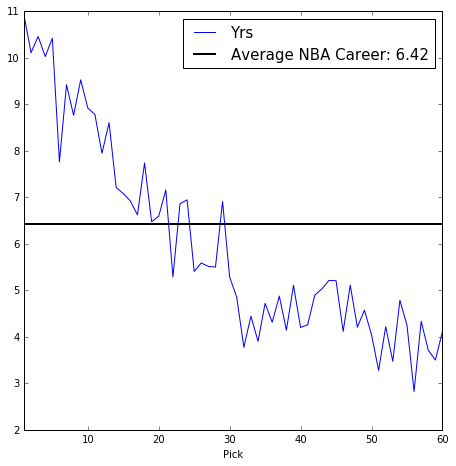

In [7]:
two_rounds.groupby('Pick')['Yrs'].mean().plot(kind = 'line', figsize = [7.5, 7.5])
average_career = two_rounds['Yrs'].mean()
average_car = plt.axhline(y = average_career, linewidth = 2, label ='Average NBA Career: ' + 
                          str(round(average_career, 2)), c='black')
plt.legend(fontsize = 15)

Average career length drops very significantly as the pick increases and this is to be expected.  Average NBA career length is 6.42 years and all 2nd round selections average less than this. 

Next I want to look at how different draft classes compare to each other

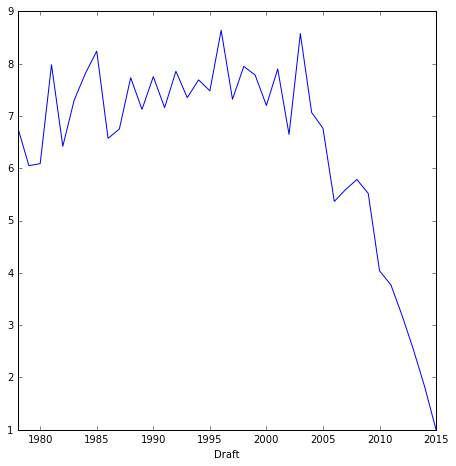

In [8]:
two_rounds.groupby('Draft')['Yrs'].mean().plot(kind='line', figsize = [7.5, 7.5])

Average years played in the NBA by draft class, drops due to players in the later draft classes haven't finished their NBA careers.   

In [9]:
season = pd.read_csv('season78.csv')

### Add win share data

In [11]:
df_b = pd.merge(two_rounds, season, on = 'Player', how = 'left')
df_b.head(3)

,Pick,Player,Yrs,Draft,Season,WS
0,1,Mychal Thompson,12.0,1978,1979.0,4.4
1,1,Mychal Thompson,12.0,1978,1981.0,5.3
2,1,Mychal Thompson,12.0,1978,1982.0,8.2


#### Win Shares by Draft Pick

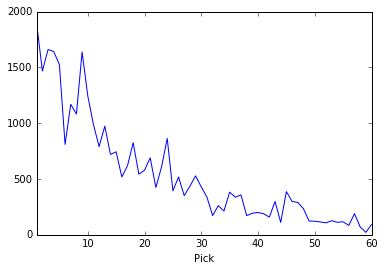

In [14]:
df_b.groupby('Pick')['WS'].sum().plot(kind='line')

#### Cumulative Win Shares by Pick

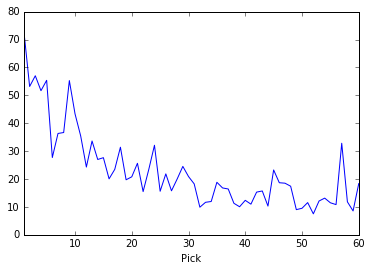

In [25]:
win_shares = df_b.groupby('Pick')['WS'].mean()
average_years = df_b.groupby('Pick')['Yrs'].mean()
overall_win_shares = win_shares * average_years
overall_win_shares.plot(kind = 'line')